In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import manhattan_distances

In [30]:
beers_dict = {'Bohemia Oscura': 'Boh_Osc',
              'Corona': 'Cor',
              'Dos Equis Laguer': 'Dos_Equ_Lag',
              'Dos Equis Ambar': 'Dos_Equ_Amb',
              'Indio': 'Ind',
              'Modelo Especial': 'Mod_Esp',
              'Negra Modelo':'Neg_Mod',
              'Sol': 'Sol',
              'Tecate Light': 'Tec_Lig',
              'Victoria': 'Vic'}

lager_dict = {'Pilsner':'Pil',
              #'Pale Lager':'Pal_Lag',
              'Amber Lager':'Amb_Lag',
              'Bock':'Boc',
              'Dark Lager':'Dar_Lag'}

ale_dict = {'Wheat Beer':'Whe_Bee',
            'Pale Ale':'Pal_Ale',
            'Indian Pale Ale':'Ind_Pal_Ale',
            'Strong Ale':'Str_Ale',
            'Brown Ale':'Bro_Ale',
            'Stout':'Sto'}

In [31]:
answers = {'Jhony':[5, 1, 2, 3, 3, 3, 4, 1, 1, 3]+[2, 3, 4, 3]+[2, 3, 5, 4, 4, 5]}

In [32]:
column_names = list(beers_dict.values())+list(lager_dict.values())+list(ale_dict.values())
df = pd.DataFrame(columns = column_names)

In [33]:
df.loc[-1] = answers['Jhony']
df.index += 1
df = df.sort_index()
df.to_csv('style_preferences.csv', index=False)

In [2]:
answers_df = pd.read_csv('../Datasets/UTP.csv')

In [9]:
answers_names_dict = {'Marca temporal':'Date',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Barrilito]':'Bar',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Bohemia Clara]':'Boh_Cla',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Bohemia Oscura]':'Boh_Osc',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Bud Light]':'Bud_Lig',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Corona]':'Cor',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Dos Equis Laguer]':'Dos_Equ_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Dos Equis Ambar]':'Dos_Equ_Amb',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Indio]':'Ind',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [León]':'Leo',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Modelo Especial]':'Mod_Esp',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Montejo]':'Mon',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Negra Modelo]':'Neg_Mod',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Pacífico]':'Pac',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Sol]':'Sol',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Tecate Roja]':'Tec_Roj',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Tecate Light]':'Tec_Lig',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para las siguientes cervezas comerciales. Si para alguna cerveza no tienes una opinión, escoge SR. [Victoria]':'Vic',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Pale Lager]':'Pal_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Pilsner]':'Pil',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Amber Lager]':'Amb_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Bock]':'Boc',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Dark Lager]':'Dar_Lag',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Wheat Beer]':'Whe_Bee',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Pale Ale]':'Pal_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Indian Pale Ale]':'Ind_Pal_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Strong Ale]':'Str_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Brown Ale]':'Bro_Ale',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Porter]':'Por',
                      'Califica del 1 (no me gusta) al 5 (me encanta) tu preferencia para los siguientes estilos. Si para algún estilo no tienes una opinión, escoge SR [Stout]':'Sto'}
answers_df.rename(columns=answers_names_dict,
                  inplace=True)
answers_df.columns

Index(['Date', 'Bar', 'Boh_Cla', 'Boh_Osc', 'Cor', 'Dos_Equ_Lag',
       'Dos_Equ_Amb', 'Ind', 'Leo', 'Mod_Esp', 'Mon', 'Neg_Mod', 'Sol',
       'Tec_Roj', 'Tec_Lig', 'Vic', 'Pal_Lag', 'Pil', 'Amb_Lag', 'Boc',
       'Dar_Lag', 'Whe_Bee', 'Pal_Ale', 'Ind_Pal_Ale', 'Str_Ale', 'Bro_Ale',
       'Por', 'Sto', 'Bud_Lig', 'Pac'],
      dtype='object')

In [10]:
answers_df.replace('SR', np.nan, inplace=True)

(array([30.,  5.,  1.,  0.,  3.,  2.,  1.,  0.,  1.,  9.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

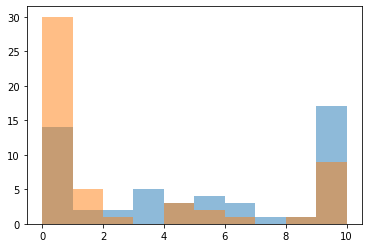

In [11]:
styles_null = []
beers_null = []
for i in range(len(answers_df.index)):
    styles_null.append(answers_df.loc[i,list(lager_dict.values())+list(ale_dict.values())].isnull().sum())
    beers_null.append(answers_df.loc[i,list(beers_dict.values())].isnull().sum())

plt.hist(styles_null, bins = 10, alpha=0.5)
plt.hist(beers_null, bins = 10, alpha=0.5)

In [12]:
answers_df['style_nulls'] = styles_null
answers_df['beer_nulls'] = beers_null

In [13]:
answers_df=answers_df[(answers_df.style_nulls<=4) & (answers_df.beer_nulls<=4)]
answers_df.reset_index(drop=True)
answers_df

,Date,Bar,Boh_Cla,Boh_Osc,Cor,Dos_Equ_Lag,Dos_Equ_Amb,Ind,Leo,Mod_Esp,...,Pal_Ale,Ind_Pal_Ale,Str_Ale,Bro_Ale,Por,Sto,Bud_Lig,Pac,style_nulls,beer_nulls
0,12/03/2020 17:14:39,2,3,5,1,3,4,3,4,3,...,4,4,5,4,4,5,NaN,NaN,0,0
2,12/03/2020 17:26:06,1,2,3,1,2,2,1,4,3,...,3,4,3,4,4,4,NaN,NaN,0,0
3,12/03/2020 17:33:57,3,3,5,2,4,4,5,4,3,...,3,5,4,4,5,5,NaN,NaN,0,0
4,12/03/2020 17:37:30,2,1,3,1,1,4,3,2,1,...,4,5,3,4,5,5,NaN,NaN,0,0
5,12/03/2020 18:08:09,2,3,3,2,2,2,2,3,2,...,4,5,5,3,5,5,NaN,NaN,0,0
6,12/03/2020 18:11:53,3,3,3,1,2,3,NaN,5,5,...,4,NaN,4,5,4,4,NaN,NaN,4,1
7,12/03/2020 18:51:03,3,3,4,2,4,4,3,5,4,...,3,5,3,4,3,5,NaN,NaN,0,0
10,13/03/2020 8:26:57,1,2,4,1,5,5,3,3,2,...,4,1,4,4,4,3,NaN,NaN,0,0
12,13/03/2020 8:46:47,3,3,3,1,3,3,3,3,3,...,2,1,3,1,2,2,NaN,NaN,2,0
14,13/03/2020 9:16:48,4,5,5,1,4,4,3,1,1,...,3,3,3,3,5,5,NaN,NaN,1,0


In [14]:
comercials = list(beers_dict.values())
comercials

['Boh_Osc',
 'Cor',
 'Dos_Equ_Lag',
 'Dos_Equ_Amb',
 'Ind',
 'Mod_Esp',
 'Neg_Mod',
 'Sol',
 'Tec_Lig',
 'Vic']

In [15]:
answers_df=answers_df.iloc[:,1:].fillna(answers_df.median())

<ipython-input-15-3b2ac0196574>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  answers_df=answers_df.iloc[:,1:].fillna(answers_df.median())


In [16]:
answers_df

,Bar,Boh_Cla,Boh_Osc,Cor,Dos_Equ_Lag,Dos_Equ_Amb,Ind,Leo,Mod_Esp,Mon,...,Pal_Ale,Ind_Pal_Ale,Str_Ale,Bro_Ale,Por,Sto,Bud_Lig,Pac,style_nulls,beer_nulls
0,2,3,5,1,3,4,3,4,3,3,...,4,4,5,4,4,5,NaN,NaN,0,0
2,1,2,3,1,2,2,1,4,3,3,...,3,4,3,4,4,4,NaN,NaN,0,0
3,3,3,5,2,4,4,5,4,3,3,...,3,5,4,4,5,5,NaN,NaN,0,0
4,2,1,3,1,1,4,3,2,1,1,...,4,5,3,4,5,5,NaN,NaN,0,0
5,2,3,3,2,2,2,2,3,2,2,...,4,5,5,3,5,5,NaN,NaN,0,0
6,3,3,3,1,2,3,3.0,5,5,2.5,...,4,4.0,4,5,4,4,NaN,NaN,4,1
7,3,3,4,2,4,4,3,5,4,1,...,3,5,3,4,3,5,NaN,NaN,0,0
10,1,2,4,1,5,5,3,3,2,2,...,4,1,4,4,4,3,NaN,NaN,0,0
12,3,3,3,1,3,3,3,3,3,3,...,2,1,3,1,2,2,NaN,NaN,2,0
14,4,5,5,1,4,4,3,1,1,1,...,3,3,3,3,5,5,NaN,NaN,1,0


In [17]:
answers['Jhony'][:10]

[5, 1, 2, 3, 3, 3, 4, 1, 1, 3]

In [18]:
answers_df[comercials]

,Boh_Osc,Cor,Dos_Equ_Lag,Dos_Equ_Amb,Ind,Mod_Esp,Neg_Mod,Sol,Tec_Lig,Vic
0,5,1,3,4,3,3,5,1,2,3
2,3,1,2,2,1,3,3,1,1,1
3,5,2,4,4,5,3,4,1,1,4
4,3,1,1,4,3,1,4,1,2,1
5,3,2,2,2,2,2,3,2,1,2
6,3,1,2,3,3.0,5,5,2,5,5
7,4,2,4,4,3,4,3,1,3,4
10,4,1,5,5,3,2,4,1,1,3
12,3,1,3,3,3,3,3,2,1,3
14,5,1,4,4,3,1,5,1,1,1


In [19]:
d_ut=manhattan_distances([answers['Jhony'][:10]], answers_df[comercials])
#d_ut=d_ut.max()-d_ut
d_ut

array([[ 4. ,  8. ,  7. ,  9. ,  9. , 12. , 10. ,  7. ,  5. ,  8. , 10. ,
         5. , 17. ,  7.5, 10. , 15. ,  7. , 18. ,  6. ,  9. , 14. , 13. ,
        11. ,  8. , 14. ]])

In [20]:
d_ut.argsort()[0][:3]

array([ 0, 11,  8], dtype=int64)

In [21]:
#(d_ut.max()-d_ut)#/(d_ut.max()-d_ut.min())
#list(d_ut[0]).index(d_ut[0].max())
A=answers_df[list(lager_dict.values())+list(ale_dict.values())].to_numpy()
A=A.astype(float)

In [22]:
print(list(beers_dict.values()))
print(answers_df.loc[[0, 11, 43],list(beers_dict.values())])#[comercials])#[])
print(answers['Jhony'][:10])
print(answers['Jhony'][:10]-answers_df.loc[[0, 11, 43],list(beers_dict.values())].to_numpy().astype(float))
print(sum(answers['Jhony'][:10]-answers_df.loc[[0, 11, 43],list(beers_dict.values())].to_numpy().astype(float)))

['Boh_Osc', 'Cor', 'Dos_Equ_Lag', 'Dos_Equ_Amb', 'Ind', 'Mod_Esp', 'Neg_Mod', 'Sol', 'Tec_Lig', 'Vic']


KeyError: '[11, 43] not in index'

In [23]:
drink_team=answers_df.loc[[0,11, 43],list(lager_dict.values())+list(ale_dict.values())].to_numpy().astype(float)
print(np.average(drink_team, axis=0))
#print(np.average(drink_team.reshape((10, 3)), axis=1))
drink_team

KeyError: '[11, 43] not in index'

In [ ]:
S_rec=np.dot(d_ut,A)

In [ ]:
S_rec/np.sum(d_ut)

In [24]:
def drunk_distances(form):
    d_na = manhattan_distances([form], answers_df[comercials])
    d_na = d_na.max()-d_na
    A = answers_df[list(lager_dict.values())+list(ale_dict.values())].to_numpy()
    A = A.astype(float)
    S_rec = np.dot(d_na, A)
    S_rec = S_rec/np.sum(d_na)
    return S_rec

In [25]:
def drink_team_rec(form):
    d_na = manhattan_distances([form], answers_df[comercials])
    top3 = list(d_ut.argsort()[0][:3])
    drink_team = answers_df.loc[top3, list(lager_dict.values())+list(ale_dict.values())].to_numpy().astype(float)
    rec = np.average(drink_team, axis=0)
    return rec

In [26]:
answers_df[list(lager_dict.values())+list(ale_dict.values())].astype(float).describe()

,Pil,Amb_Lag,Boc,Dar_Lag,Whe_Bee,Pal_Ale,Ind_Pal_Ale,Bro_Ale,Sto,Str_Ale
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,3.200000,3.24000,3.160000,3.640000,2.840000,3.320000,3.400000,3.360000,3.880000,3.120000
std,1.224745,1.16476,0.986577,1.150362,1.247664,1.069268,1.384437,1.254326,1.268858,1.013246
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.00000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000
50%,3.000000,3.00000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,4.000000,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [27]:
drunk_distances(answers['Jhony'][:10])#[0][:5]

array([[3.08232446, 3.23244552, 3.3874092 , 3.92736077, 2.93220339,
        3.19854722, 3.43825666, 3.37772397, 4.03874092, 3.29782082]])

In [28]:
drunk_distances(answers['Jhony'][:10])[0].mean()

3.3912832929782084

In [29]:
drink_team_rec(answers['Jhony'][:10])

KeyError: '[11, 8] not in index'

In [ ]:
l = [i for i in range(10)]
sum(l)/len(l)